<center>
<h1>Image Noise Reduction with Auto-encoders</h1>
</center>



In [73]:
import numpy as np

from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

%matplotlib inline

# Loading and Visulizing Dataset

In [44]:
# loading dataset 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [45]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


In [108]:
# defining visualization method
import random

def plot(X, predictions=None):
    nrows = 4
    ncols = 4

    # Set up matplotlib fig, and size it to fit 4x4 pics
    fig = plt.gcf() 
    fig.set_size_inches(10, 10)

    for i in range(nrows*ncols):
        # setting up subplot
        sp = plt.subplot(nrows, ncols, i + 1)

        # displaying random image and label name 
        rint = random.randint(0, X.shape[0]) # generating a random number 

        # displaying image 
        img = X[rint]
        plt.imshow(img, cmap='binary')

        # removing axis ticks 
        plt.xticks([])
        plt.yticks([])

        # displaying label if predictions
        if predictions is not None: 
            plt.title(f"{np.argmax(predictions[rint])}")

    plt.show()

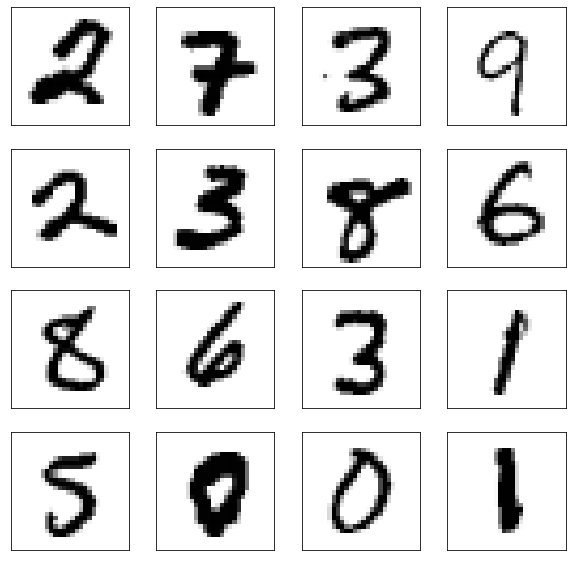

In [22]:
# visulizing training dataset 
plot(X_train)

# Data Preprocessing

In [46]:
# adding channel dimension 
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


In [47]:
# normalizing images 
X_train = X_train.astype('float32') / 255. 
X_test = X_test.astype('float32') / 255.

# Building a Classifier

In [48]:
# defining the model
classifier = Sequential([
    Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'), 
    MaxPooling2D(),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=84, activation='relu'),
    Dense(units=10, activation = 'softmax')
])

# defining loss function and optimizer
classifier.compile(
        optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics = ["accuracy"]
    )

# displaying model summary
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [49]:
# training the model 
hist_classifier = classifier.fit(
        x=X_train, y=Y_train,
        validation_split=0.2,
        epochs=150,
        batch_size=32, 
        callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
    )

Epoch 1/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5986 - accuracy: 0.8183 - val_loss: 0.1931 - val_accuracy: 0.9389
Epoch 2/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1733 - accuracy: 0.9462 - val_loss: 0.1201 - val_accuracy: 0.9647
Epoch 3/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1186 - accuracy: 0.9634 - val_loss: 0.1060 - val_accuracy: 0.9678
Epoch 4/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0945 - accuracy: 0.9706 - val_loss: 0.0846 - val_accuracy: 0.9737
Epoch 5/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.0772 - val_accuracy: 0.9774
Epoch 6/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.0772 - val_accuracy: 0.9760
Epoch 7/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0619 - accuracy: 0.9800 - val_loss: 0.0696 - val_ac

In [56]:
def plot_acc(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

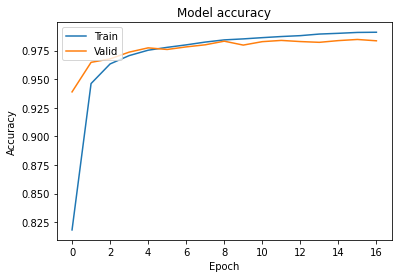

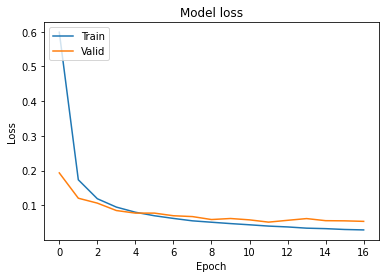

In [79]:
# plotting training curves 
plot_acc(hist_classifier)
plot_loss(hist_classifier)

In [59]:
# evaluating on test set 
tloss_classifier, tacc_classifier = classifier.evaluate(x=X_test, y=Y_test)

print(f"Classifier Test Loss: {tloss_classifier:.3f}")
print(f"Classifier Test Accuracy: {tacc_classifier:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9883
Classifier Test Loss: 0.039
Classifier Test Accuracy: 0.988


# Adding Noise

In [86]:
# adding noise 
X_train_noisy = X_train + np.random.rand(*X_train.shape) * 0.9
X_test_noisy = X_test + np.random.rand(*X_test.shape) * 0.9

# clipping noisy image pixel values to [0, 1]
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

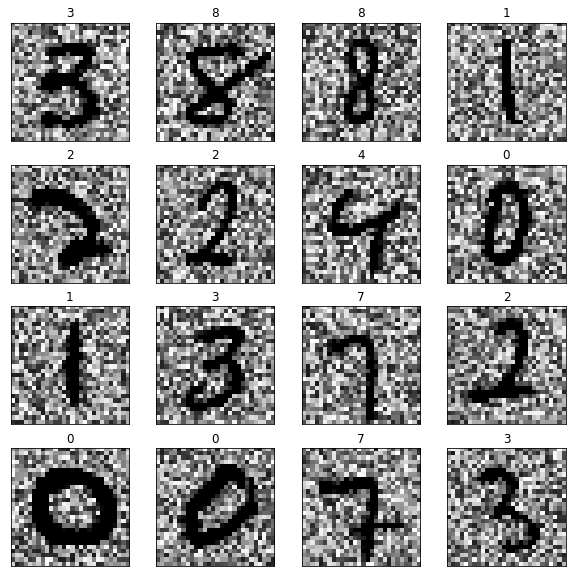

In [114]:
# visualizing noisy data
plot(np.squeeze(X_train_noisy, axis=-1), predictions=to_categorical(Y_train))

In [88]:
 # evaluating classifier on noisy test data 
nloss_classifier, nacc_classifier = classifier.evaluate(x=X_test_noisy, y=Y_test)

print(f"Classifier Test Loss (Noisy Data): {nloss_classifier:.3f}")
print(f"Classifier Test Accuracy (Noisy Data): {nacc_classifier:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 2.2603 - accuracy: 0.5162
Classifier Test Loss (Noisy Data): 2.260
Classifier Test Accuracy (Noisy Data): 0.516


# Building an Autoencoder

In [89]:
# defining the model 
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoding')(x)   # shape: (4, 4, 8) = 128

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

# defining loss function and optimizer
autoencoder.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics = ["accuracy"]
    )

# displaying model summary
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
encoding (MaxPooling2D)      (None, 4, 4, 8)          

In [90]:
# training the model 
hist_autoencoder = autoencoder.fit(
        x=X_train_noisy, y=X_train,
        validation_split=0.2,
        epochs=200,
        batch_size=32, 
        callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
    )

Epoch 1/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1939 - accuracy: 0.7985 - val_loss: 0.1555 - val_accuracy: 0.8028
Epoch 2/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1454 - accuracy: 0.8042 - val_loss: 0.1422 - val_accuracy: 0.8026
Epoch 3/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1334 - accuracy: 0.8067 - val_loss: 0.1293 - val_accuracy: 0.8080
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1257 - accuracy: 0.8081 - val_loss: 0.1233 - val_accuracy: 0.8093
Epoch 5/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1207 - accuracy: 0.8091 - val_loss: 0.1205 - val_accuracy: 0.8112
Epoch 6/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.8097 - val_loss: 0.1159 - val_accuracy: 0.8113
Epoch 7/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1147 - accuracy: 0.8101 - val_loss: 0.1146 - val_ac

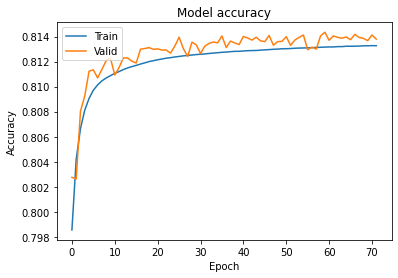

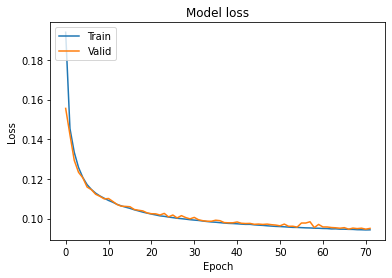

In [91]:
# plotting training curves 
plot_acc(hist_autoencoder)
plot_loss(hist_autoencoder)

In [92]:
# evaluating on test set 
tloss_autoencoder, tacc_autoencoder = autoencoder.evaluate(x=X_test_noisy, y=X_test)

print(f"Autoencoder Test Loss: {tloss_autoencoder:.3f}")
print(f"Autoencoder Test Accuracy: {tacc_autoencoder:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.8122
Autoencoder Test Loss: 0.093
Autoencoder Test Accuracy: 0.812


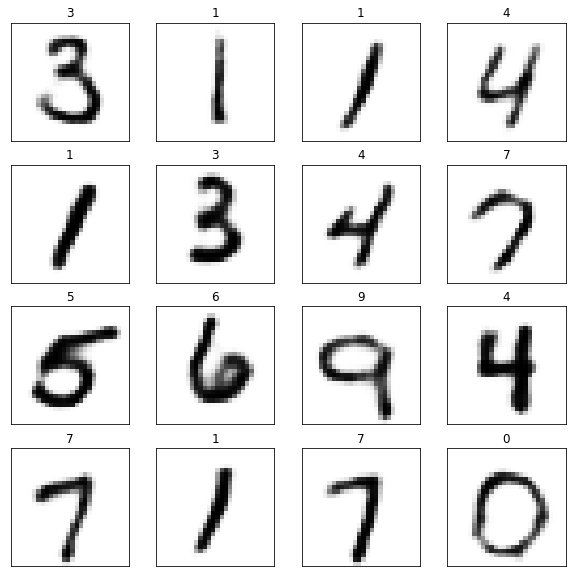

In [111]:
#visualizing denoised images 
X_denoisy = autoencoder.predict(X_test_noisy)
plot(np.squeeze(X_denoisy, axis=-1), predictions=to_categorical(Y_test))

# Composite Model

In [96]:
# defining the model 
noisy_input = Input(shape=(28, 28, 1))
x = autoencoder(noisy_input)
y = classifier(x)

denoise_and_classify = Model(noisy_input, y)

In [102]:
denoise_and_classify.compile(
        loss='sparse_categorical_crossentropy',
        metrics = ["accuracy"]
    )

In [103]:
# evaluating on noisy test set
dnloss_classifier, dnacc_classifier = denoise_and_classify.evaluate(x=X_test_noisy, y=Y_test)

print(f"Denoised Classifier Test Loss (Noisy Data): {dnloss_classifier:.3f}")
print(f"Denoised Classifier Test Accuracy (Noisy Data): {dnacc_classifier:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1090 - accuracy: 0.9641
Denoised Classifier Test Loss (Noisy Data): 0.109
Denoised Classifier Test Accuracy (Noisy Data): 0.964


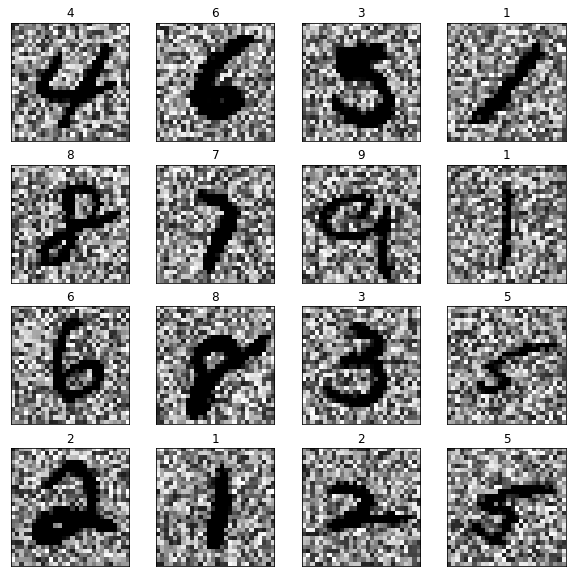

In [113]:
# visualizing composite model precitions 
Y_denoisy = denoise_and_classify.predict(X_test_noisy)
plot(np.squeeze(X_test_noisy, axis=-1), predictions=Y_denoisy)